# Project 1: Exploring Weather Trends.

**Summary**
In this project, we will analyze local and global temperature data and compare the temperature trends in Barcelona, spain to overall global temperature trends.

In [23]:
import pandas as pd
import numpy as np

In [2]:
df_bcn    = pd.read_csv(r'data_sets\results_bcn.csv')
df_global = pd.read_csv(r'data_sets\results_global.csv')

In [3]:
df_bcn.head(10)

,year,city,country,avg_temp
0,1743,Barcelona,Spain,13.81
1,1744,Barcelona,Spain,16.98
2,1745,Barcelona,Spain,10.78
3,1746,Barcelona,Spain,NaN
4,1747,Barcelona,Spain,NaN
5,1748,Barcelona,Spain,NaN
6,1749,Barcelona,Spain,NaN
7,1750,Barcelona,Spain,16.52
8,1751,Barcelona,Spain,16.78
9,1752,Barcelona,Spain,13.09


In [4]:
df_bcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [5]:
df_bcn.loc[df_bcn.avg_temp.isnull()]

,year,city,country,avg_temp
3,1746,Barcelona,Spain,NaN
4,1747,Barcelona,Spain,NaN
5,1748,Barcelona,Spain,NaN
6,1749,Barcelona,Spain,NaN


In [6]:
df_global

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [7]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


___df_gobal starts in the yaer 1750 and df_bcn has NaN values registers in the years 1746-1747-1748-1749. we decide to start the analysis in 1750, earasing the NaN values in df_bcn___

In [8]:
df_bcn.drop(columns='country', inplace=True)

In [9]:
df_bcn_2 = df_bcn.iloc[7:,:].reset_index()

In [10]:
df_bcn_2

,index,year,city,avg_temp
0,7,1750,Barcelona,16.52
1,8,1751,Barcelona,16.78
2,9,1752,Barcelona,13.09
3,10,1753,Barcelona,16.17
4,11,1754,Barcelona,16.09
...,...,...,...,...
259,266,2009,Barcelona,17.45
260,267,2010,Barcelona,16.51
261,268,2011,Barcelona,17.90
262,269,2012,Barcelona,17.51


In [11]:
df_global_2 = df_global.iloc[:-2,:]

#### With the boths dataframes ready, we are able to procede with the simple movingo areas. We will take means each 10 25 and 50 years.

In [12]:
years_smas = [10,25,50]

for i in years_smas:
    
    df_bcn_2[f'smas{i}'] = df_bcn_2.avg_temp.rolling(i).mean().shift()
    df_global_2[f'smas{i}'] =  df_global_2.avg_temp.rolling(i).mean().shift()

<ipython-input-12-ac67e1346abe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_2[f'smas{i}'] =  df_global_2.avg_temp.rolling(i).mean().shift()


In [13]:
df_bcn_2.head(26)

,index,year,city,avg_temp,smas10,smas25,smas50
0,7,1750,Barcelona,16.52,NaN,NaN,NaN
1,8,1751,Barcelona,16.78,NaN,NaN,NaN
2,9,1752,Barcelona,13.09,NaN,NaN,NaN
3,10,1753,Barcelona,16.17,NaN,NaN,NaN
4,11,1754,Barcelona,16.09,NaN,NaN,NaN
5,12,1755,Barcelona,15.80,NaN,NaN,NaN
6,13,1756,Barcelona,16.11,NaN,NaN,NaN
7,14,1757,Barcelona,15.88,NaN,NaN,NaN
8,15,1758,Barcelona,15.04,NaN,NaN,NaN
9,16,1759,Barcelona,16.19,NaN,NaN,NaN


In [44]:
df_global_2.head(26)

,year,avg_temp,smas10,smas25,smas50
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,NaN,NaN,NaN
5,1755,8.36,NaN,NaN,NaN
6,1756,8.85,NaN,NaN,NaN
7,1757,9.02,NaN,NaN,NaN
8,1758,6.74,NaN,NaN,NaN
9,1759,7.99,NaN,NaN,NaN


In [46]:
df_global_2.loc[(df_global_2.avg_temp< 8.35) & (df_global_2.year>=1980)].tail(50)

,year,avg_temp,smas10,smas25,smas50


In [48]:
df_bcn_2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,264.0,138.500000,76.354437,7.0000,72.75000,138.5000,204.2500,270.0000
year,264.0,1881.500000,76.354437,1750.0000,1815.75000,1881.5000,1947.2500,2013.0000
avg_temp,264.0,16.141780,0.592889,13.0900,15.83000,16.0950,16.4700,17.9000
smas10,254.0,16.124173,0.381538,15.3450,15.88425,16.0740,16.2505,17.2880
smas25,239.0,16.097610,0.287194,15.7524,15.87920,16.0132,16.2234,17.1480
smas50,214.0,16.060159,0.210578,15.7986,15.90110,15.9762,16.1881,16.6946


In [49]:
df_global_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,264.0,1881.500000,76.354437,1750.0000,1815.7500,1881.5000,1947.25000,2013.0000
avg_temp,264.0,8.359394,0.575184,5.7800,8.0775,8.3650,8.70000,9.7300
smas10,254.0,8.339516,0.434993,7.2030,8.0500,8.2715,8.63325,9.5540
smas25,239.0,8.316248,0.355981,7.7072,8.0934,8.2032,8.63780,9.3336
smas50,214.0,8.283253,0.305715,7.8106,8.0445,8.2031,8.54985,9.0226


## 2. Data Visualization

In [50]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### 2.1 Line plots with the differents moving averages

In a first impression, we will compare the the differents averages movements with the daily average. For vusualazing, we chose the line plots from seaborn and we use the matplot lib ploting tools.

   - The line plot is ideal for data series representations
   - Putting the avg togethers allows us to relate in differents levels the volatitlity of the temperature.

#### Temperatures in Barcelona

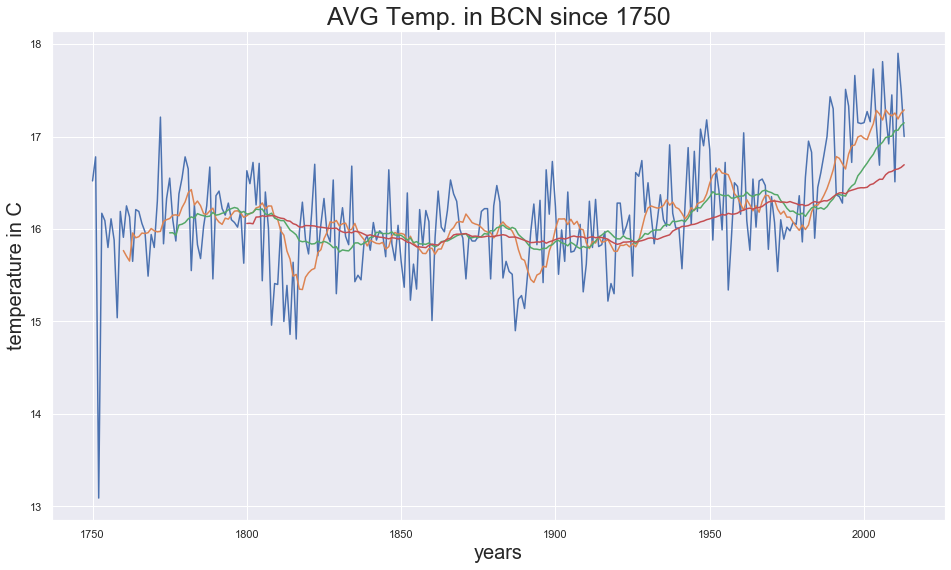

In [71]:
plt.figure(figsize=(16,9))

ax = sns.lineplot(x='year', y='avg_temp', data=df_bcn_2)
ax = sns.lineplot(x='year', y='smas10', data=df_bcn_2)
ax = sns.lineplot(x='year', y='smas25', data=df_bcn_2)
ax = sns.lineplot(x='year', y='smas50', data=df_bcn_2)
ax.set_title('AVG Temp. in BCN since 1750', fontsize=25)
ax.set_xlabel('years', fontsize=20)
ax.set_ylabel('temperature in C', fontsize=20)
plt.savefig('avg_temp_bcn.png')

#### Temperatures Global wides

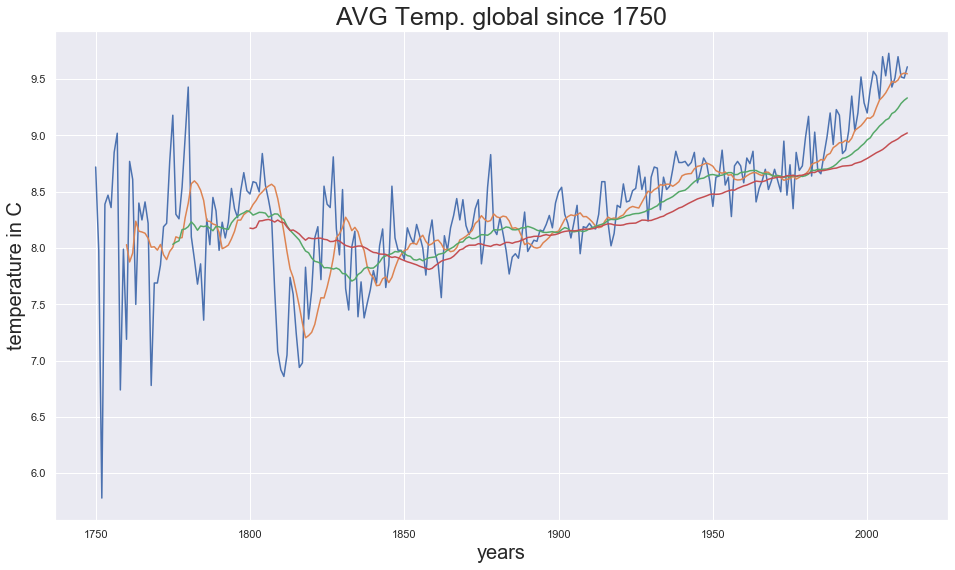

In [70]:
plt.figure(figsize=(16,9))

ax = sns.lineplot(x='year', y='avg_temp', data=df_global_2)
ax = sns.lineplot(x='year', y='smas10', data=df_global_2)
ax = sns.lineplot(x='year', y='smas25', data=df_global_2)
ax = sns.lineplot(x='year', y='smas50', data=df_global_2)
ax.set_title('AVG Temp. global since 1750', fontsize=25)
ax.set_xlabel('years', fontsize=20)
ax.set_ylabel('temperature in C', fontsize=20)
plt.savefig('avg_temp_global.png')

In [60]:
df_bcn_2.columns

Index(['index', 'year', 'city', 'avg_temp', 'smas10', 'smas25', 'smas50'], dtype='object')

<Figure size 1152x648 with 0 Axes>

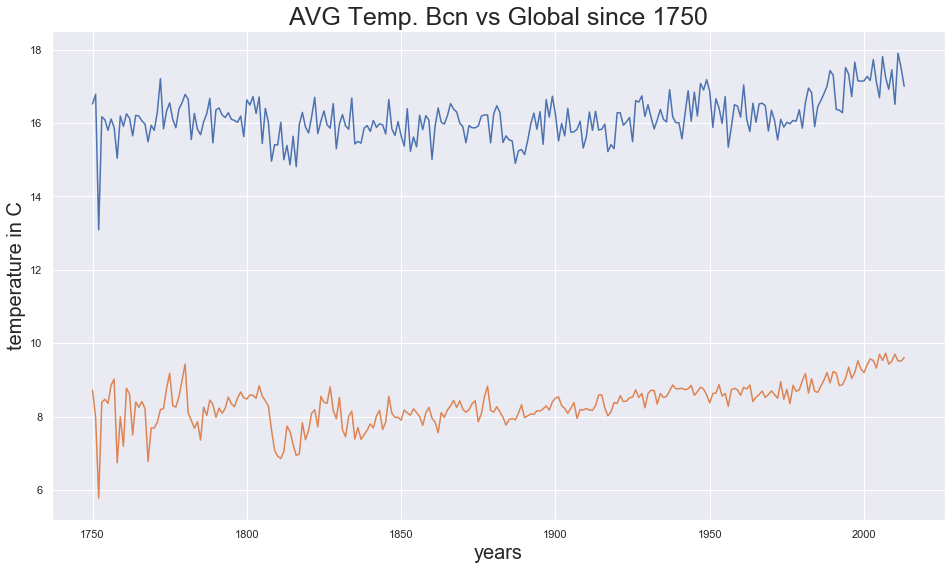

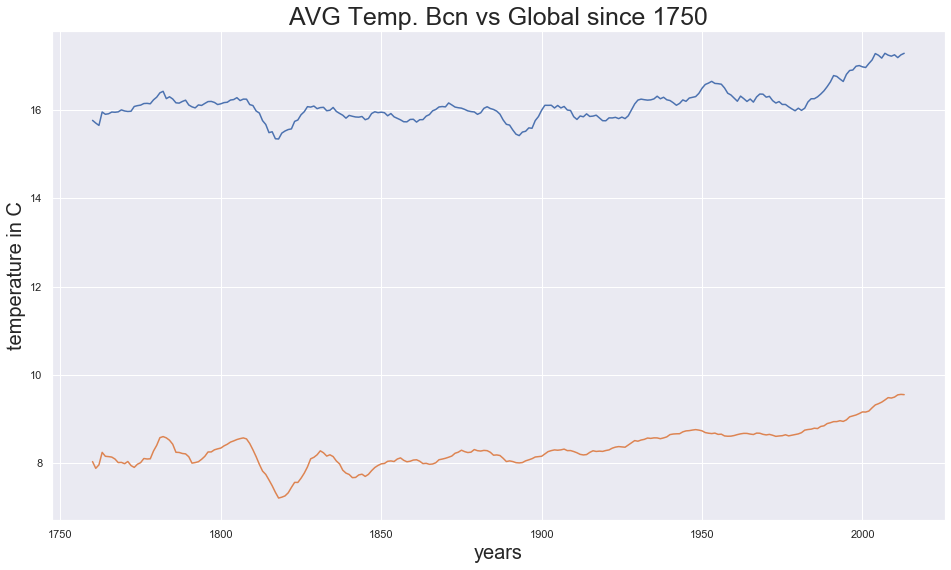

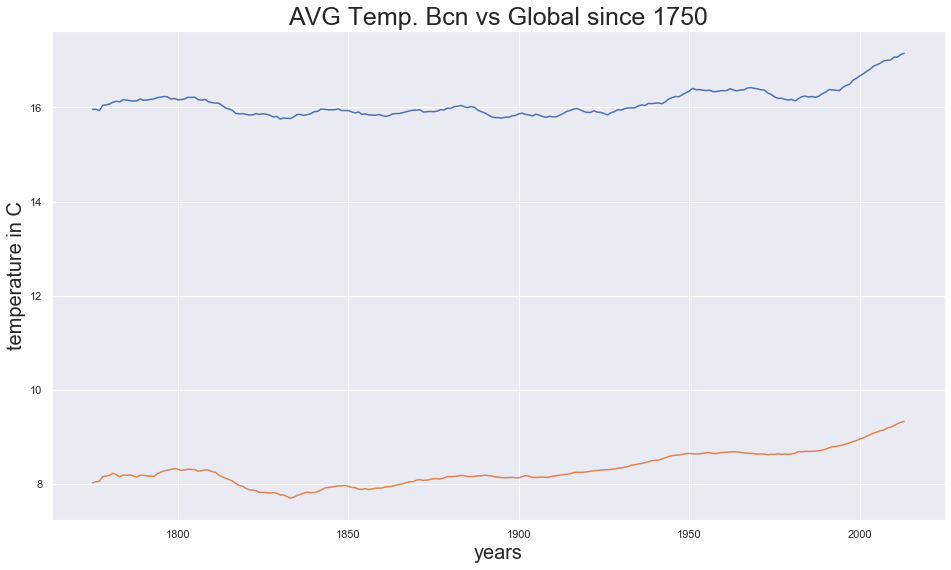

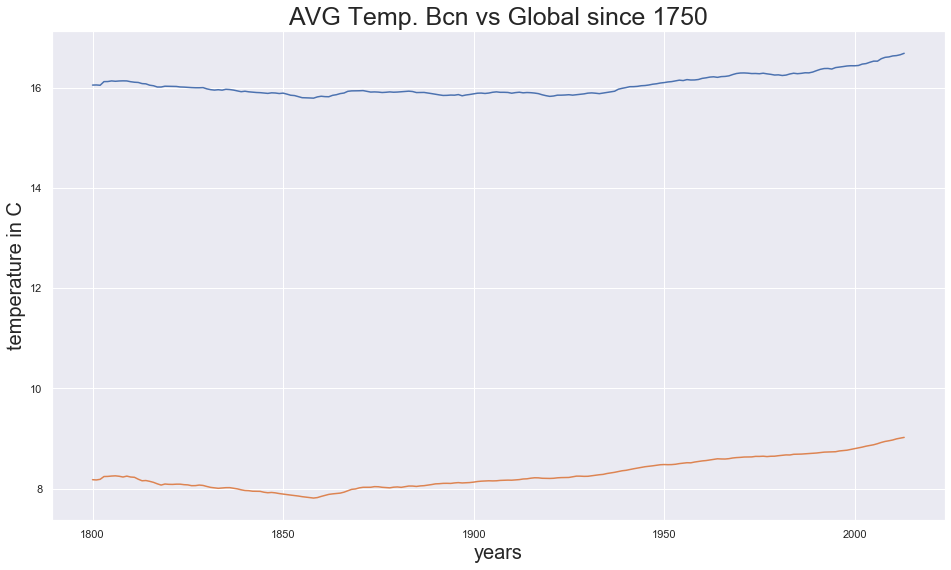

In [56]:
curves = ['avg_temp', 'smas10', 'smas25', 'smas50']

plt.figure(figsize=(16,9))

for i in curves:
    plt.figure(figsize=(16,9))
    
    ax = sns.lineplot(x='year', y=i, data=df_bcn_2)
    ax = sns.lineplot(x='year', y=i, data=df_global_2)
    
    ax.set_title('AVG Temp. Bcn vs Global since 1750', fontsize=25)
    ax.set_xlabel('years', fontsize=20)
    ax.set_ylabel('temperature in C', fontsize=20)
    plt.savefig(f'avg_temp_curves{i}.png')

<Figure size 1152x648 with 0 Axes>

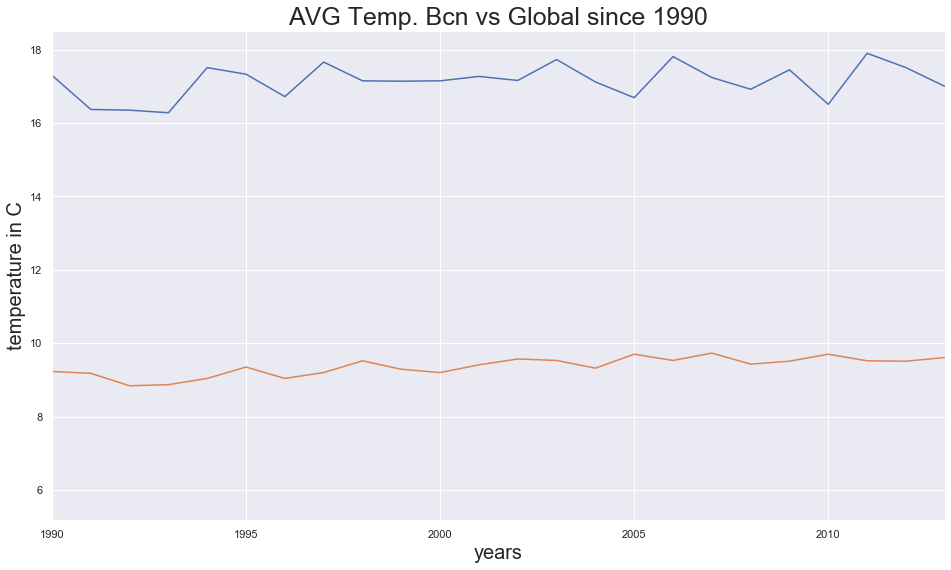

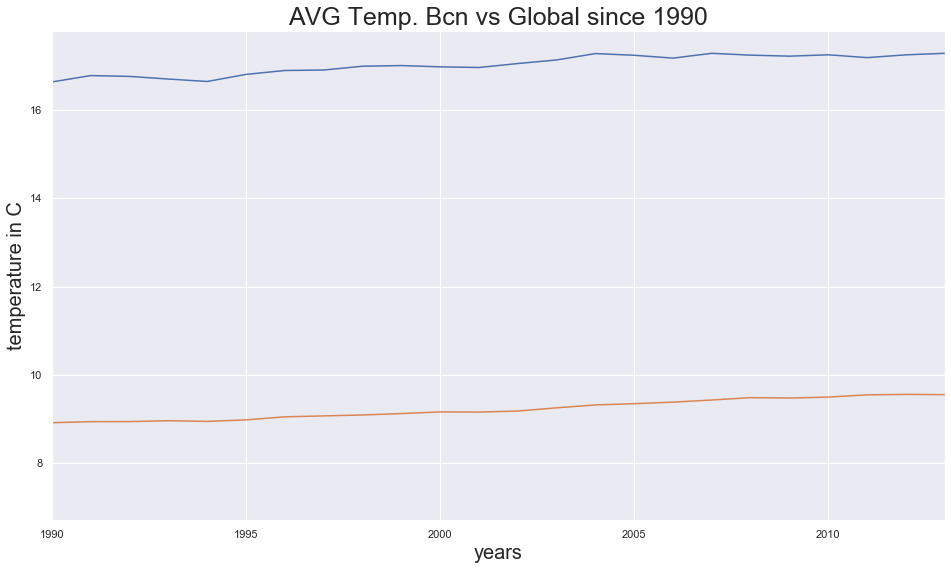

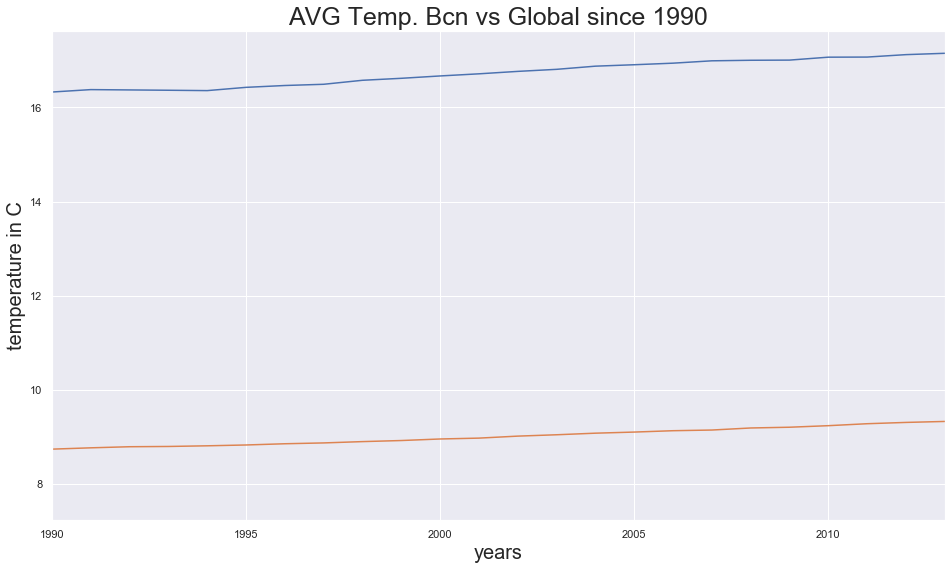

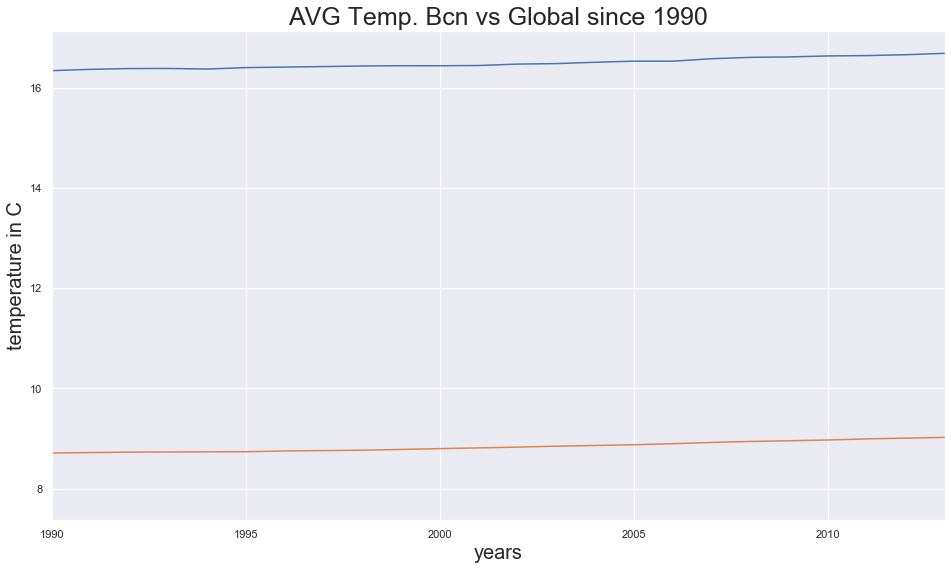

In [58]:
curves = ['avg_temp', 'smas10', 'smas25', 'smas50']

plt.figure(figsize=(16,9))

for i in curves:
    plt.figure(figsize=(16,9))
    plt.xlim(1990, 2013)
    
    
    ax = sns.lineplot(x='year', y=i, data=df_bcn_2)
    ax = sns.lineplot(x='year', y=i, data=df_global_2)
    
    ax.set_title('AVG Temp. Bcn vs Global since 1990', fontsize=25)
    ax.set_xlabel('years', fontsize=20)
    ax.set_ylabel('temperature in C', fontsize=20)
    
    plt.savefig(f'avg_temp_curves{i}from_1990.png')